# BAT.jl plotting tutorial

In [ ]:
using BAT
using Distributions
using IntervalSets

## Generate samples to be plotted

In [2]:
struct MultiModalModel<:AbstractDensity
    r::Vector{Float64}
    sigma::Vector{Float64}
end


likelihood = params -> begin

    r1 = logpdf.(
    MixtureModel(Normal[
    Normal(-10.0, 1.2),
    Normal(0.0, 1.8),
    Normal(10.0, 2.5)], [0.1, 0.3, 0.6]), params.a)

    r2 = logpdf.(
    MixtureModel(Normal[
    Normal(-5.0, 2.2),
    Normal(5.0, 1.5)], [0.3, 0.7]), params.b[1])

    r3 = logpdf.(Normal(2.0, 1.5), params.b[2])

    return LogDVal(r1+r2+r3)
end

prior = BAT.NamedTupleDist(
    a = Normal(-3, 4.5),
    b = [-20.0..20.0, -10..10]
)

posterior = PosteriorDensity(likelihood, prior);

samples, chains = bat_sample(posterior, (10^5, 4), MetropolisHastings());

┌ Info: Trying to generate 4 viable MCMC chain(s).
└ @ BAT /home/cornelius/Projects/julia/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:193
┌ Info: Selected 4 MCMC chain(s).
└ @ BAT /home/cornelius/Projects/julia/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:304
┌ Info: Begin tuning of 4 MCMC chain(s).
└ @ BAT /home/cornelius/Projects/julia/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:65
┌ Info: MCMC Tuning cycle 1 finished, 4 chains, 0 tuned, 4 converged.
└ @ BAT /home/cornelius/Projects/julia/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ Info: MCMC Tuning cycle 2 finished, 4 chains, 2 tuned, 4 converged.
└ @ BAT /home/cornelius/Projects/julia/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ Info: MCMC Tuning cycle 3 finished, 4 chains, 3 tuned, 4 converged.
└ @ BAT /home/cornelius/Projects/julia/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ Info: MCMC Tuning cycle 4 finished, 4 chains, 3 tuned, 4 converged.
└ @ BAT /home/cornelius/Projects/julia/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ Info: MCMC Tuning cycle

## Set up plotting
Set up plotting using the [Plots.jl](https://github.com/JuliaPlots/Plots.jl) package:

In [3]:
using Plots

The BAT.jl plotting recipes have been tested with `pyplot()`, `gr()` and `plotly()` backends.
All available plotting options work correctly with `pyplot()`.
Only colored 2D contour plots are currently not correctly supported by the `gr()` and `plotly()` backends.
The backend can be chosen using:

In [4]:
#gr() # Julia's default
#pyplot()
#plotly()

## Examples for 1D plots
BAT.jl includes different plotting styles (seriestypes) for 1D representations of samples and priors:
  * `:smallest_intervals` (alias `:HDR`): highlighting the smallest intervals containing a certain probability (highest density regions) by color
  * `:central_intervals`: highlighting the central intervals containing a certain probability by color
  * `:histogram` (alias `:steppost`): filled histogram
  * `:stephist`: step histogram
Examples of (marginalized) 1D representations of samples and priors are shown below.

### Default 1D plot of samples:
Samples can be plotted either by their index or by using the parameter name (as a symbol or expression) as specified in the prior:

In [5]:
plot(samples, :a) #default seriestype = :smallest_intervals (alias :HDR)
#or: plot(samples, 2)

The default seriestype for plotting samples is `:smallest_intervals` (alias `:HDR`), highlighting the smallest intervals (the highest density region) containing 68.3, 95.5 and 99.7 perecent of the posterior probability. By default, the local mode(s) of the histogram is(are) indicated as dotted black line(s).

### Default 1D plot of prior:
Priors can be plotted either by their index or by using the parameter name:

In [6]:
plot(prior, :a)
#or: plot(prior, 1)

## Knowledge update plot
The knowledge update after performing the sampling can be visualized by plotting the prior and the samples of the psterior together in one plot using `plot!()`:

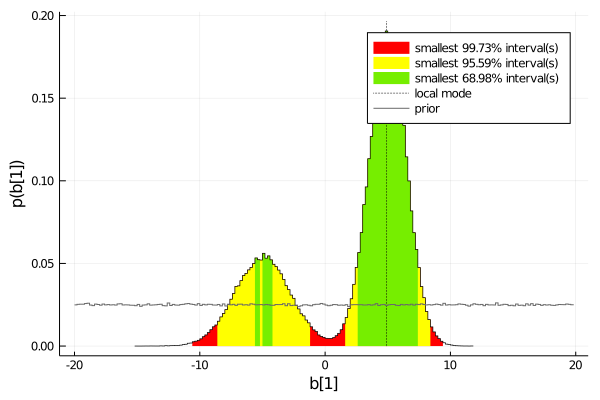

In [7]:
plot(samples, :(b[1]))
plot!(prior, :(b[1]))

## Further seriestypes for 1D plots (samples and prior):
### central intervals:

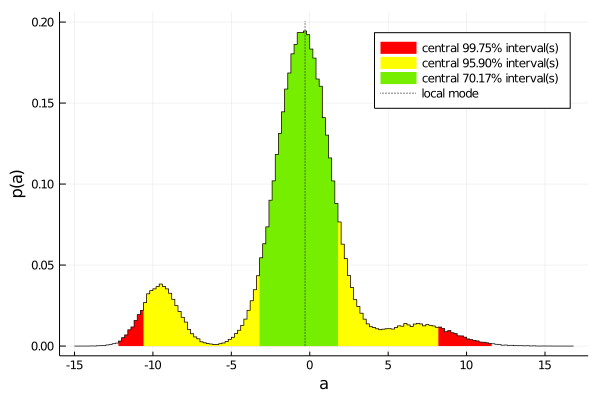

In [8]:
plot(samples, :a, seriestype = :central_intervals)

### filled histogram:

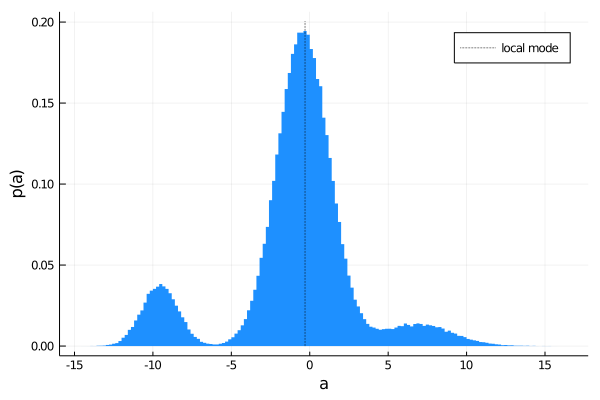

In [9]:
plot(samples, :a, seriestype = :histogram) # alias :hist

### step histogram:

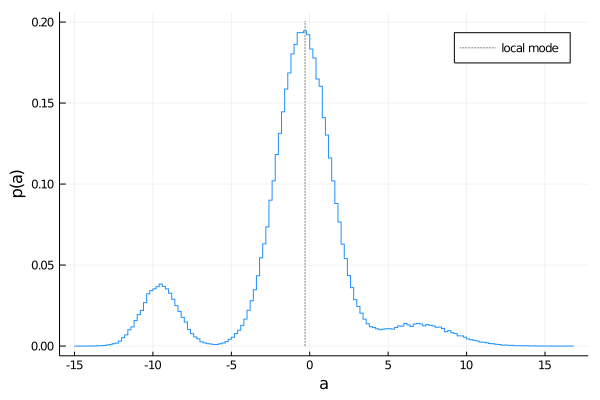

In [10]:
plot(samples, :a, seriestype = :stephist)

## Customizing 1D plots:

### Keyword arguments for [attributes supported by *Plots.jl*](https://docs.juliaplots.org/latest/attributes/#attributes-1) can be passed:

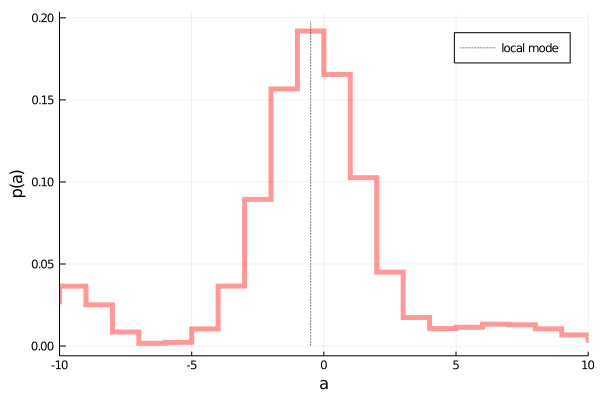

In [11]:
plot(samples, :a, seriestype = :stephist, nbins=50, linecolor = :red, linewidth = 5, linealpha=0.4, xlim=(-10,10))

### Customizing interval plots:
For `:smallest_intervals` and `:central_intervals` plot, the probability enclosed in the intervals to be highlighted can be specified using the `intervals` keyword.
The keyword `interval_labels` allows to specify the legend entries for the corresponding intervals (in same order).
The interval colors need to be specified (in same order) using the `colors` keyword argument.

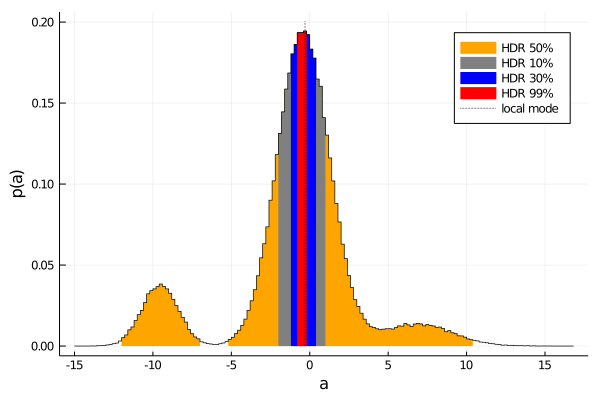

In [12]:
plot(samples, :a, seriestype=:smallest_intervals,
    intervals=[0.5, 0.1, 0.3, 0.99],
    interval_labels = ["HDR 50%", "HDR 10%", "HDR 30%", "HDR 99%"],
    colors=[:grey, :red, :blue, :orange]
)

### Plotting estimators in 1D sample plots:
It is possible to indicate *mean*, *standard deviation*, *localmode*, and *globalmode* when plotting samples:

In [13]:
plot(samples, :(b[1]), globalmode=true, localmode=true, mean=true, std=true)

#### The style of the estimators can be customized:
By passing `true`, the point estimators are plotted using their default styles shown above.
The styles can be modified by passing dictionaries specifying `linestyle`, `linecolor`, `linewidth` and `alpha` for *mean*, *globalmode* and *localmode*.
The style of the standard deviation can be modified by specifying `fillcolor` and `fillalpha`.

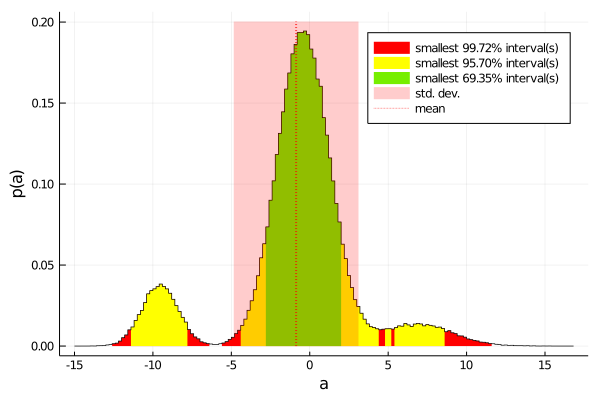

In [14]:
plot(samples, :a, localmode=false,
    mean=Dict("linestyle" => :dot, "linecolor"=> :red, "linewidth"=>2, "alpha" => 0.7),
    std=Dict("fillcolor" => :red, "fillalpha"=>0.2))

## Examples for 2D plots of samples and priors
Below, all available seriestypes and plotting features for 2D representations of samples and priors are shown
  * `:smallest_intervals` (alias `:HDR`): histogram of the smallest intervals containing a certain probability (highest density regions)
  * `:smallest_intervals_contour`: (colored) contours of the smallest intervals containing a certain probability (highest density regions)
  * `:smallest__intervals_contourf`: (colored) filled contours of the smallest intervals containing a certain probability (highest density regions)
  * `:histogram2d` (alias `:histogram`, `:hist`): 2D histogram

### Default 2D plot  of samples:

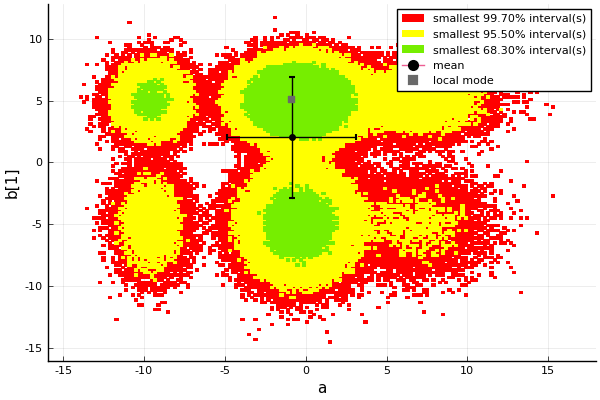

In [15]:
pyplot()
plot(samples, (:a,:(b[1])), mean=true, std=true) #default seriestype = :smallest_intervals (alias :HDR)

The default seriestype for plotting samples is a 3-color heatmap showing the smallest intervals (highest density regions) containing 68.3%, 95.5% and 99.7% of the posterior probability. By default, the local mode
of the histogram is indicated by a black square.

### Default 2D plot  of priors:

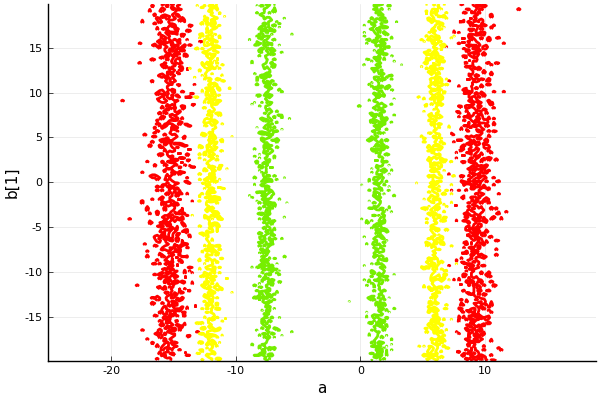

In [16]:
plot(prior, (:a, :(b[1]))) # default seriestype :smallest_intervals_contour

## 2D knowledge update plot

In [17]:
plot(samples, (:a, :(b[2])))
plot!(prior, (:a, :(b[2])))

## Further seriestypes for 2D plots (samples and prior):
### histogram:

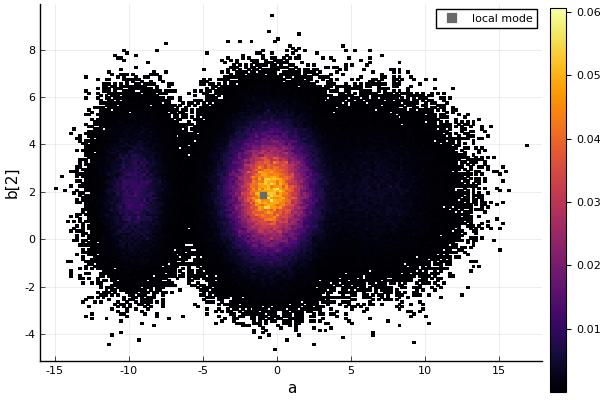

In [18]:
plot(samples, (:a,:(b[2])), seriestype = :histogram)

### smallest intervals as colored contour lines:
(currently only correctly supported with `pyplot()` backend)

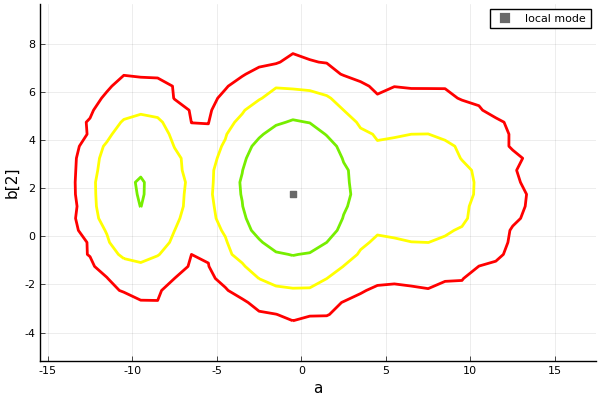

In [19]:
plot(samples, (:a,:(b[2])), seriestype=:smallest_intervals_contour, bins=40)

### smallest intervals as filled contours:
(currently only correctly supported with `pyplot()` backend)

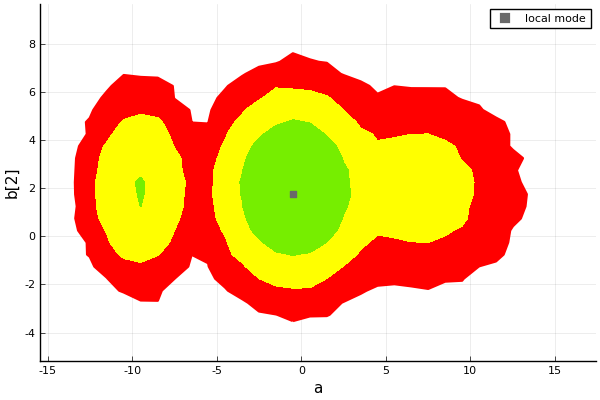

In [20]:
plot(samples, (:a,:(b[2])), seriestype=:smallest_intervals_contourf, bins=40)

### Customizing smallest interval plots:
The probability intervals to be highlighted can be specified using the `intervals` keyword.
The keyword `interval_labels` allows to specify the legend entries for the corresponding intervals (in same order).
The interval colors need to be specified (in same order) using the `colors` keyword argument.

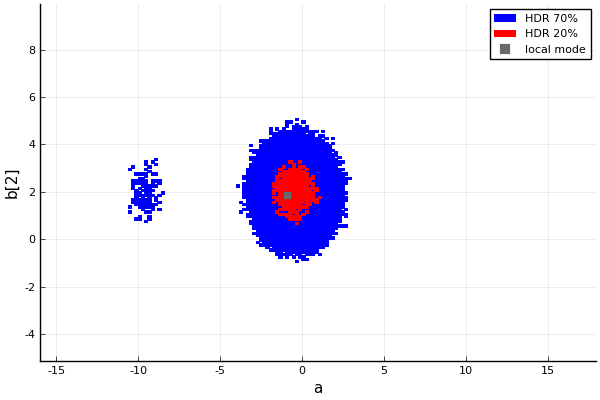

In [21]:
plot(samples, (:a,:(b[2])), seriestype=:smallest_intervals, nbins=200,
intervals=[0.7, 0.2],
interval_labels = ["HDR 70%", "HDR 20%"],
colors=[:blue, :red])

### marginal plot:

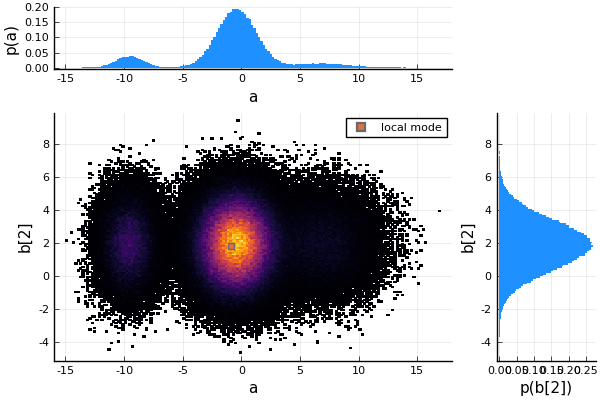

In [22]:
plot(samples, (:a, :(b[2])), seriestype = :marginal)

### scatter plot:
(Only plotting the first 10.000 sample points, as for a large number of samples plot takes a lot of time and resources.)

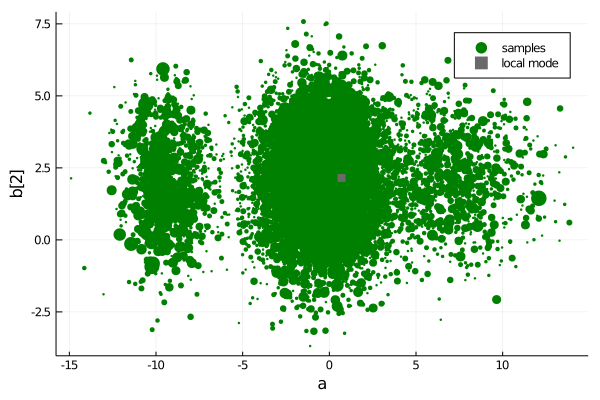

In [23]:
gr()
plot(samples[1:10^4], (:a,:(b[2])), seriestype = :scatter)

## Customizing 2D plots:
### Plotting point estimators in 2D plots:

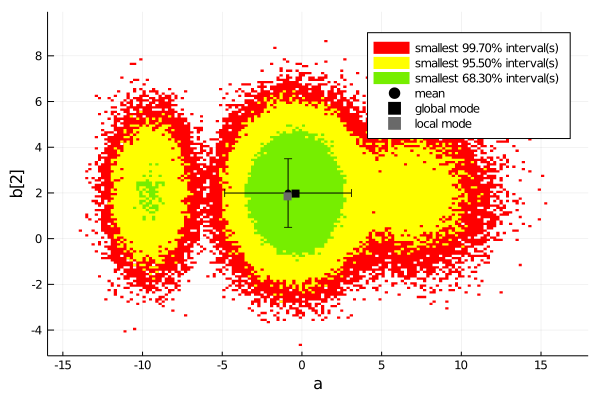

In [24]:
plot(samples, (:a,:(b[2])), seriestype=:smallest_intervals, nbins=200,
    mean=true, std=true, localmode=true, globalmode=true)

#### It is possible to customize the style of the estimators:
By passing `true`, the point estimators are plotted using their default styles shown above.
The style of the point estimators *mean*, *globalmode* and *localmode* can be modified by passing a dictionary specifying `markershape`, `markercolor`, `markersize`, `markeralpha`, `markerstrokecolor`, `markerstrokestyle`, `markerstrokewidth` and `markerstrokealpha`.
If `std==true`, the standard deviation of the mean value will be displayed as x- and y-errorbars.

In [25]:
plot(samples, (:a,:(b[2])), seriestype=:smallest_intervals, nbins=200,
    localmode=Dict("markershape"=> :diamond, "markeralpha"=>1, "markercolor"=>:red, "markersize"=>5),
    mean = true, std=true
)

### Customizing marginal plots:
Marginal plots can be modified by passing dictionaries to the keyword arguments `upper`, `right` and `diagonal`.
The dictionaries for `upper` and `right` can contain the seriestypes and plot options for 1D distributions shown above.
The dictionary for `diagonal` can use the seriestypes and plot options for 2D plots shown above.

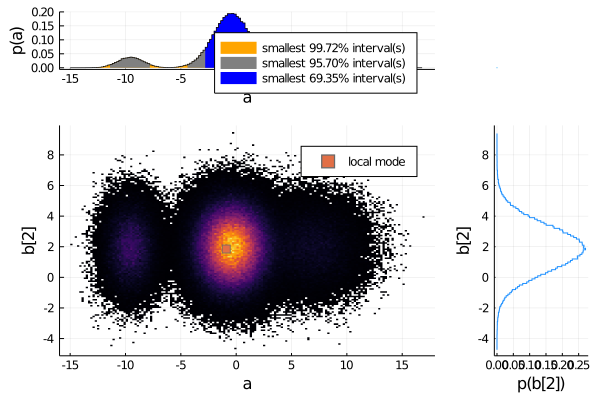

In [26]:
plot(samples, (:a,:(b[2])), seriestype = :marginal,
    diagonal = Dict("seriestype"=>:histogram),
    upper=Dict("seriestype" => :smallest_intervals, "colors"=>[:blue, :grey, :orange]),
    right=Dict("seriestype" => :stephist)
)

## Overview plots
Without specifying the parameters to be plotted, the 1D and 2D plots of (up to) the first 5 parameters are displayed as a grid.

In [27]:
plot(samples)

plot(prior)

plot(samples)
plot!(prior)

The keyword argument `vsel` allows to specify which parameters to consider in the overview plot by passing the indeces:

In [28]:
plot(samples, vsel=[1, 3])

### Customizing overview plots:
The overview plots can be modified by passing dictionaries to the keyword arguments `upper`, `lower` and `diagonal`.
The dictionaries for `upper` and `lower` can contain the 2D seriestypes and plot options shown above.
The dictionary for `diagonal` can use the 1D seriestypes and plot options shown above.
Nested dictonaries are possible (e.g. for modifying point estimators)

In [29]:
plot(samples, mean=true, globalmode=true, legend=true,
    diagonal=Dict("seriestype"=>:stephist, "mean"=>Dict("linecolor" => :green, "linewidth" => 8)),
    lower = Dict("mean" => false, "colors"=>[:orange, :green, :grey]))

## Plots for MCMC diagnostics
The diagnostic plots allow to plot the samples, a kernel density estimate, the trace and the autocorrelation function for each parameter and each chain:
The parameters to be considered can be chosen with the `vsel` keyword.

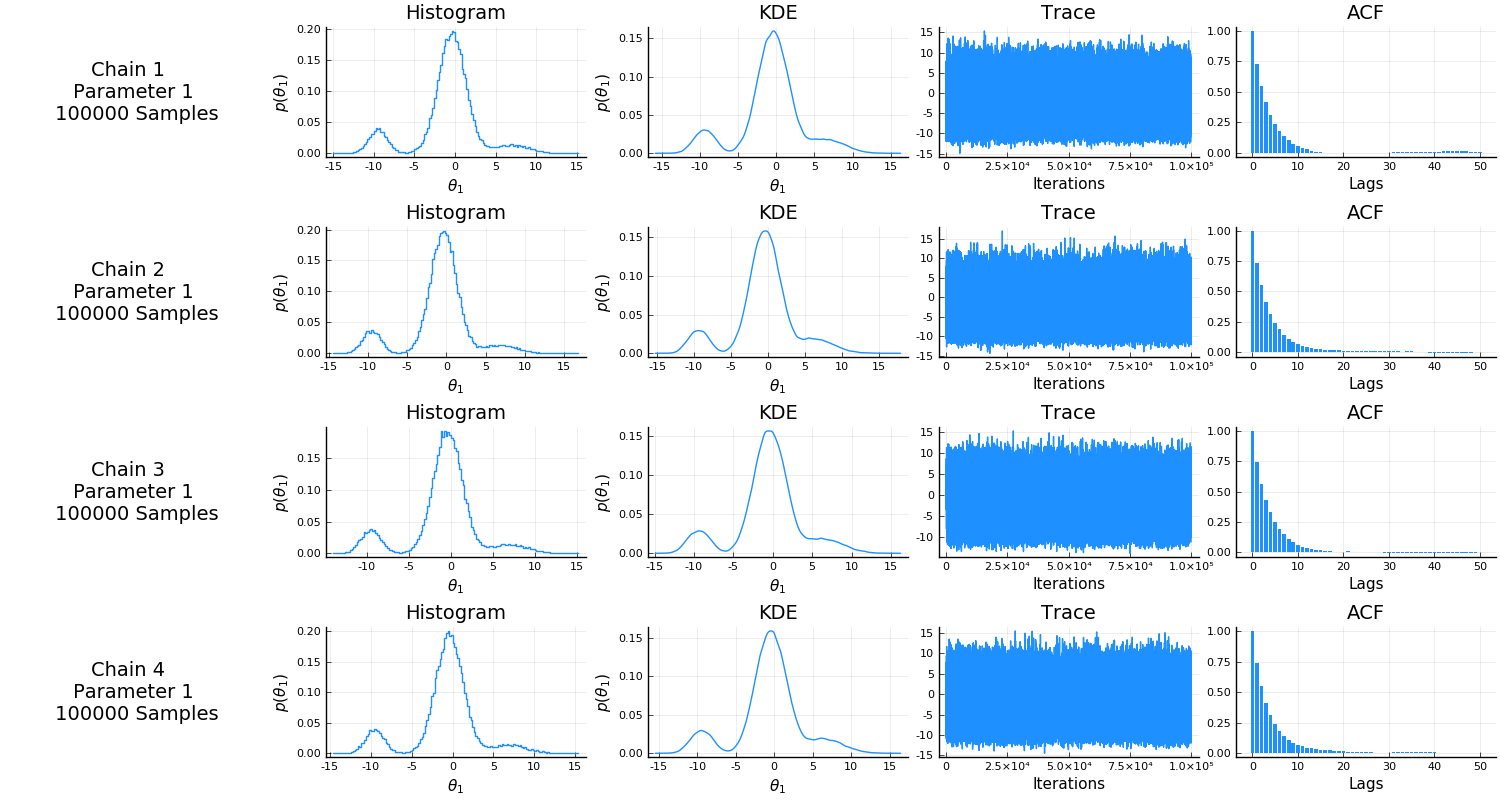

In [30]:
diagnostics = BAT.MCMCDiagnostics(samples, chains)
pyplot()
plot(diagnostics, vsel=[1])

### Customizing diagnostics plots:
#### available keyword arguments:
* `vsel` - list of parameters to be plotted
* `chains` - list of chains to be plotted
* `diagnostics` - list of MCMC diagnostics to be plotted
  * `:histogram` - 1D histograms of samples
  * `:kde` - Kernel density estimate (using [*KernelDensity.jl*](https://github.com/JuliaStats/KernelDensity.jl))
  * `:trace` - Trace plot
  * `:acf` - Autocorrelation function (using [*StatsBase.autocor*](http://juliastats.github.io/StatsBase.jl/stable/signalcorr/#StatsBase.autocor))
* `description::Bool = true` - show description (current chain, parameter, number of samples) as first column of plots
* `histogram::Dict` - options for histogram plots (supports all arguments for 1D plots for samples)
* `kde::Dict` - options for kde plots
* `trace::Dict` - options for trace plots
* `acf::Dict` - options for acf plots
#### special options arguments for `:kde` (see [*KernelDensity.jl*](https://github.com/JuliaStats/KernelDensity.jl))
* `npoints`: number of interpolation points to use (default: npoints = 2048)
* `boundary`: lower and upper limits of the kde as a tuple
* `kernel`: the distributional family from [*Distributions.jl*](https://github.com/JuliaStats/Distributions.jl) to use as the kernel (default = Distributions.Normal)
* `bandwidth`: bandwidth of the kernel
#### special keyword arguments for `:acf` (see [*StatsBase.autocor*](http://juliastats.github.io/StatsBase.jl/stable/signalcorr/#StatsBase.autocor))
* `lags` - list of lags to be considered for ACF plots
* `demean` - denotes whether the mean should be subtracted before computing the ACF

In [31]:
plot(diagnostics,
    vsel=[1, 2],
    chains=[1, 2],
    diagnostics = [:histogram, :kde, :trace, :acf],
    histogram = Dict("seriestype" => :smallest_intervals, "legend" => :false),
    trace = Dict("linecolor" => :red),
    acf = Dict("lags" => collect(1:20), "title"=> "Autocorrelation"),
    description = true)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*